In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series

tf = pd.read_csv('../../data/events.csv', low_memory=False)

In [3]:
tf['timestamp'] = pd.to_datetime(tf['timestamp']) #hago date time el tiempo

**Agrego columnas del mes, el día y la hora.** 

In [4]:
# NO HAGO UNA COLUMNA AÑO, PORQUE EL ÚNICO QUE HAY ES 2018
tf['mes'] = tf['timestamp'].map(lambda x: x.month)#LOS MESES VAN DEL 1 AL 6
tf['nombreDelDia'] = tf['timestamp'].map(lambda x: x.weekday_name)
tf['hora'] = tf['timestamp'].dt.hour

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  This is separate from the ipykernel package so we can avoid doing imports until


#Analisis Exploratorio de los datos
## Eventos


In [5]:
# ¿Cuántos eventos hay?
cantidadDeObservaciones = len(tf)

In [6]:
# ¿Cuantos hay de cada evento?
eventos = tf.event
eventos.value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

In [7]:
# ¿hay eventos nulos? 
eventos.isnull().sum() # -> ESTO ES BUENO porque no tengo eventos invalidos

0

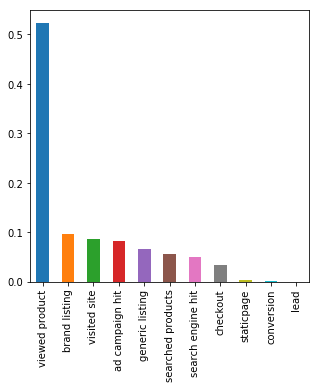

In [8]:
#Gráfico de los eventos
eventosAGraf = eventos.value_counts(normalize = True)
#print(eventosAGraf)
eventosAGraf.plot(kind='bar',figsize=(5,5))

**Conclusión:**

    -El 52% de observaciones son viewed productos (más frecuente)
    
    -El 0,004% de observaciones son lead (menos frecuente)

### ¿Qué campos obligatorios tiene cada evento?

In [9]:
viewedProduct = tf[tf['event'] == 'viewed product']
viewedProductIsNull = viewedProduct.isnull().sum()
brandListing    = tf[tf['event'] == 'brand listing']
brandListingIsNull  = brandListing.isnull().sum()
visitedSite =  tf[tf['event'] == 'visited site']
visitedSiteIsNull = visitedSite.isnull().sum()
adCampaignHit = tf[tf['event'] == 'ad campaign hit']
adCampaignHitIsNull = adCampaignHit.isnull().sum()
genericListing = tf[tf['event'] == 'generic listing']
genericListingIsNull = genericListing.isnull().sum()
searchedProducts = tf[tf['event'] == 'searched products']
searchedProductsIsNull = searchedProducts.isnull().sum()
searchEngineHit = tf[tf['event'] == 'search engine hit']
searchEngineHitIsNull = searchEngineHit.isnull().sum()
checkout = tf[tf['event'] == 'checkout']
checkoutIsNull = checkout.isnull().sum()
staticpage = tf[tf['event'] == 'staticpage']
staticpageIsNull = staticpage.isnull().sum()
conversion = tf[tf['event'] == 'conversion']
conversionIsNull = conversion.isnull().sum()
lead = tf[tf['event'] == 'lead']
leadIsNull = lead.isnull().sum()
pd.DataFrame(dict(viewedProduct = viewedProductIsNull , brandListing = brandListingIsNull, visitedSite = visitedSiteIsNull , adCampaignHit = adCampaignHitIsNull, genericListing = genericListingIsNull, searchedProducts = searchedProductsIsNull, searchEngineHit = searchEngineHitIsNull, checkout = checkoutIsNull, staticpage = staticpageIsNull, conversion = conversionIsNull, lead = leadIsNull)).reset_index()

,index,viewedProduct,brandListing,visitedSite,adCampaignHit,genericListing,searchedProducts,searchEngineHit,checkout,staticpage,conversion,lead
0,timestamp,0,0,0,0,0,0,0,0,0,0,0
1,event,0,0,0,0,0,0,0,0,0,0,0
2,person,0,0,0,0,0,0,0,0,0,0,0
3,url,528931,98635,87378,71,67534,56073,50957,33735,3598,1172,448
4,sku,0,98635,87378,82827,67534,56073,50957,0,3598,0,448
5,model,0,98635,87378,82827,67534,56073,50957,2,3598,0,0
6,condition,0,98635,87378,82827,67534,56073,50957,2,3598,0,448
7,storage,0,98635,87378,82827,67534,56073,50957,2,3598,0,448
8,color,0,98635,87378,82827,67534,56073,50957,2,3598,0,448
9,skus,528931,311,87378,82827,113,119,50957,33735,3598,1172,448


**Los campos obligatorios son: **


(los eventos hora mes y nombre de dia son comunes a todos porque timestamp es comun a todos y todos los timestamp tiene información en el formato correcto)


Para el evento **viewed product**: timestamp | person | sku | model | condition | storage | color.

Para el evento **brand listing**: timestamp | person | skus -> **analizar los 311 skus null**

Para el evento **visited site**: channel | new_vs_returning | city | region | country | device_tipe | screen resolution | operating system version | browser version

Para el evento **ad campaing hit**: timestap | person | url | campaing_sourse -> **analizar que sucede con los 71 null que aparecen url , y los 31 que aparecen en campaing_source y eliminarlos si no sirve**

Para el evento **generic listing**: timestamp | person | skus ->**analizar que sucede con los 113 null que aparecen en skus**

Para el evento **serched product**: timestamp | person | skus | search_term -> **analizar que sucede con los 119 null que aparecen skus y 7106 null que aparecen en search_term**

Para el evento **serched engine**: timestamp | person | search engine

Para el evento **checked out**: timestamp | person | sku | color | storage | model | condition -> **analizar que sucede con los 2 null que aparecen en: color, storage, model, condition**

Para el evento **static page**: timestamp | person | satatic page

Para le evento **conversion**: timestamp | person | sku | model | color | condition | storage

Para el evento **lead**: timestamp | person | model

Esto lo deducimos porque si la cantidad de apariciones de cada evento es igual a la cantidad de nulls que tiene en una columna -> esa columna no representa nada para el evento. 

### Viewed Product

**¿Cuál son las condiciones en las que se encuentraron los modelos que los usuarios visitan?**

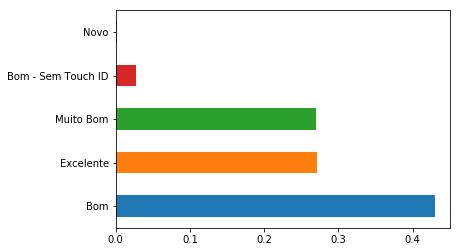

In [10]:
productosCondicionesGraf = viewedProduct.condition.value_counts(normalize = True)
#print(productosCondicionesGraf)
productosCondicionesGraf.plot(kind = 'barh')

**Conclusión de los productos que visitaron el usuario sobre la calidad de los productos:**

    -el 0,02 porciento de los productos que visita el usuario son nuevos
         
    -el 2% de los productos que tienen identificador de huella digital 
    
    -el 42% de los productos son de calidad buena
    
    -el 27% de los productos son de calidad excelente 
    
    -el 27% de los productos son de calidad muy buena

**¿Cuál es el almacenamiento de los modelos que los usuarios visitaron?**

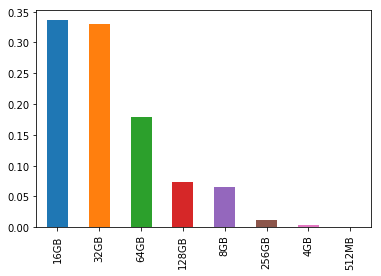

In [11]:
productosStorageGraf = viewedProduct.storage.value_counts(normalize = True)
#print(productosStorageGraf)
productosStorageGraf.plot(kind = 'bar')

**Conclusión de los productos que visitó el usuario sobre el almacenamiento de los productos: ** 
    
    - El 33% visita productos con almacenamiento de 16 GB
    - El 32% visita productos con almacenamiento de 32 GB
    - El 17% visita productos con almacenamiento de 64 GB
    - EL 6% visita productos con almacenamiento de 8 GB
    

**¿Cuál es el color de los modelos que los usuarios visitaron?**

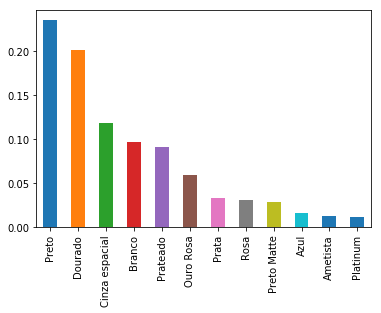

In [12]:
productosColorGraf = viewedProduct.color.value_counts(normalize = True).head(12)
#print(productosColorGraf)
productosColorGraf.plot(kind = 'bar')

**Conclusión de los productos que visitó el usuario sobre el color de los productos:**
    - el 23% de los productos son negro
    - el 20% de los productos son dorados
    - el 11% de los productos son gris espacial
    - ... completar

**¿En qué momento del día los usuarios visitaron los modelos?**

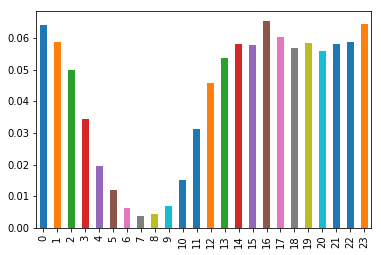

In [13]:
productosTimeStampGraf = viewedProduct.hora.value_counts(normalize = True, sort = False)
productosTimeStampGraf.plot(kind = 'bar')

**Conclusión sobre a qué hora se visitan los modelos **

Los modelos se visitan más frecuentemente entre las 14hs y las 2hs.

**¿Qué días se visitaron más productos?**

Tuesday      0.170930
Wednesday    0.162689
Thursday     0.161450
Friday       0.147367
Monday       0.146811
Saturday     0.114028
Sunday       0.096725
Name: nombreDelDia, dtype: float64


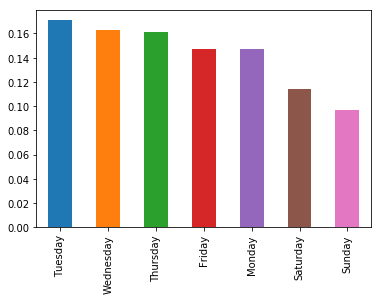

In [14]:
productosTimeStampGraf = viewedProduct.nombreDelDia.value_counts(normalize = True)
print(productosTimeStampGraf)
productosTimeStampGraf.plot(kind = 'bar')
#PREGUNTAR COMO ORDENAR ESTO POR DÍA DE LA SEMANA

**Conclusión sobre qué día visitaron más los productos:**

    -El día que menos productos se visitan son los domingos, seguido por los sábados

**¿En qué meses se visitaron más productos?**

1    0.016734
2    0.026714
3    0.074993
4    0.124674
5    0.478913
6    0.277972
Name: mes, dtype: float64


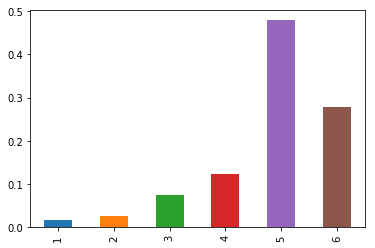

In [15]:
productosTimeStampGraf = viewedProduct.mes.value_counts(normalize = True, sort = False)
print(productosTimeStampGraf)
productosTimeStampGraf.plot(kind = 'bar')
#modificar el plot para ver el nombre del mes

**Conclusión sobre el mes en el que más se visitaron productos:**

  -el 47% de los productos se visitaron en Mayo
  
  -el 27% de los productos se visitaron en Junio (cayó respecto a Mayo)
  
  -el 13% de los productos se visitaron en Abril
  
  -el 7% de los productos se visitaron en marzo
  
  -el 2% de los productos se visitaron en Febrero
  
  -el 1% de los productos se visitaron en Enero


### Brand Listing

En brand listing había 311 skus nulls que, en mi opinión son observaciones invalidas porque brand lisiting es el evento que representa: El usuario visita un listado específico de una marca viendo un conjunto de productos.Y skus representa: Identificador de producto relacionado al evento.

**¿Cuáles fueron los skus más buscados?**

Skus es una lista de sku. Cada sku representa un modelo. Cada skus representa un conjunto de productos. 

In [16]:
productos = tf.loc[:,['model','sku','storage','color','condition']]
productos = productos.dropna() #este dataframe tiene todos los productos. Cada producto es 
#diferente segun modelo, storage, color y condición. Cada uno tiene un sku diferente.
productos = productos.drop_duplicates()
marcas = brandListing['skus'].str.split(",",expand = True)
#marcas[0].value_counts() #hay 1400 marcas
marcas.head()
#NO SE CÓMO SE PUEDE HACER UN ANÁLISIS POR MARCA. SON MUCHAS 
#COMO PARA IDENTIFICARLAS POR PRODUCCTO MANUALMENTE

,0,1,2,3,4,5,6,7,8,9,10,11
12,5075,12536,12520,12661,12506,12549,10449,9175,9218,7825,2929,8567
14,5075,12536,12520,12661,12506,12549,10449,9175,9218,7825,2929,8567
20,8499,8485,8471,8443,None,None,None,None,None,None,None,None
24,2694,2711,6011,5904,6931,2830,6023,10294,3647,2710,9988,3635
25,6931,6888,6847,6957,6902,6832,6581,6875,8965,8980,8952,None


### Visited site

**channel:** Tipo de canal desde donde se originó el evento.

**new_vs_returning:** Indicador de si el evento fue generado por un usuario nuevo (New) o por un usuario que previamente había visitado el sitio (Returning) según el motor de analytics.

**city |region | country**

**device_tipe:** Tipo de dispositivo desde donde se genero el evento.

**screen resolution:** Resolución de pantalla que se está utilizando en el dispositivo
desde donde se genero el evento.

**operating system version:** Version de sistema operativo desde donde se origino el
evento.

**browser version:** Versión del browser utilizado en el evento

In [17]:
visitedSite.channel.value_counts() #NO SÉ A QUÉ SE REFIERE CON CHANNEL

Paid        44193
Direct      18522
Organic     12348
Referral    11384
Social        846
Email          76
Unknown         9
Name: channel, dtype: int64

**¿Cuánta gente es nueva? ¿Cuánta gente volvió?**

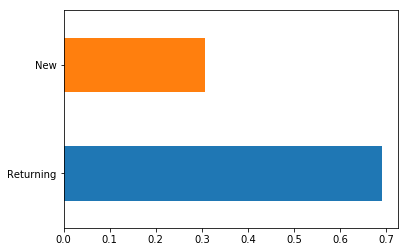

In [19]:
newVsRetruningGraf = visitedSite.new_vs_returning.value_counts(normalize = True)
#print(newVsRetruningGraf)
newVsRetruningGraf.plot(kind = "barh")

**Conclusión**:
    -El 69% de la gente volvió
    -El 39% de la gente es nueva

**¿Desde qué dispositivo accederon los usuarios?**

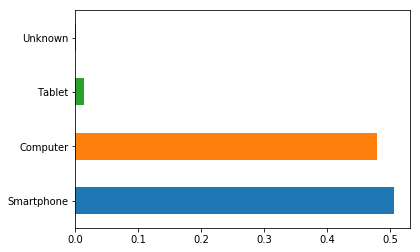

In [21]:
deviceTypeGraf = visitedSite.device_type.value_counts(normalize = True)
#print(deviceTypeGraf)
deviceTypeGraf.plot(kind = "barh")

**Conclusión:**

    -El 50% accede desde su teléfono
    -El 47% accede desde su computadora
    -El 1% accedde desde su tablet

**¿Desde qué sistema operativo accedieron los usuarios?**

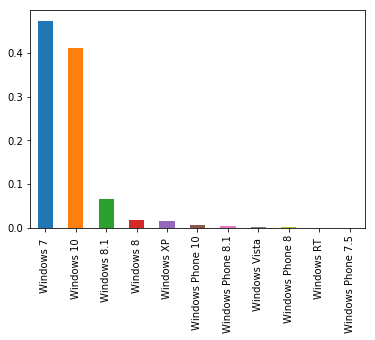

In [77]:
operatingSystemVersion = visitedSite.operating_system_version
#print(operatingSystemVersion.value_counts())
#Android 
usuariosDeWindows = operatingSystemVersion.loc[operatingSystemVersion.str.contains('Windows')].value_counts(normalize = True)
usuariosDeAndroid = operatingSystemVersion.loc[operatingSystemVersion.str.contains('Android')].value_counts()
usuariosDeIos = operatingSystemVersion.loc[operatingSystemVersion.str.contains('iOS')].value_counts()
usuariosDeLinux = operatingSystemVersion.loc[operatingSystemVersion.str.contains('Linux')].value_counts()
usuariosDeMac = operatingSystemVersion.loc[operatingSystemVersion.str.contains('Mac')].value_counts()
usuariosDeWindows.plot('bar')
##operatingSystemVersion.plot(kind = "bar")
#hay 121 sistemas operativos

86933